# 3-20 Demo

We've already seen in Problem 2 last week in `3-13Problems` that we can construct a ruling on the complement of the filled Julia set by repeatedly backiterating a large-radius circle. These circles are like our latitude lines, which begs the question: how do we find the corresponding longitude lines? If we do, we will have a complete set of coordinates on this region, as promised by the Riemann mapping theorem and its applications to the current context. It turns out that the longitude lines are extremely important in understanding the structure of *parabolic* fixed points, which in turn govern bifurcations between hyperbolic components of the Mandelbrot set $M$, and many other features we intend to study. Luckily we can actually construct these longitude lines in a pretty straightforward way.

What we are calling longitude lines are actually called *external rays* (once we extend them all the way to $J_F$ if $J_F$ is not connected, which is possible, on account of an argument using the Green's function.) The plotting of these external rays is included in sage for the Mandelbrot set, but not for Julia sets. For the Mandelbrot set we use the function `external_ray` i.e. 

    external_ray([[3/15, 7/15]])
    
will plot the external rays for angles $3/15 \cdot 2\pi$ and $7/15 \cdot 2\pi$ 

We know that the external rays correspond to given angles $\theta \in [0, 2\pi)$ Further, we know they are mapped to other external rays under $f_c$. It turns out that we are primarily interested in studying those that come back to themselves after repeatedly iterating $f_c$. But since $f_c$ just looks like $z \mapsto z^2$ for very large $z$, and those lines just look like $r e^{i\theta_0}$ for constant $\theta_0$ for large $r$, and $z^2$ maps $e^{i\theta_0}$ to $e^{i2\theta_0}$. So the action of $f_c$ on external rays is just the map 
$$\theta \mapsto 2\theta.$$
This somewhat explains the reason that `external_ray` multiplies the angle by $1/2\pi$ since this map on rational numbers is just 
$a/b \mapsto 2a/b - k$ where 
$k$ is the unique integer so that $2a/b \in [0,1)$. 

So we can find interesting orbits of external rays by finding rational numbers $a/b$ such that repeatedly doubling and then subtracting an integer gets us back to where we started. Problem 1 will be about finding these with these periodic orbits with small order. Let's see an example
$$ \frac 1 3 \mapsto \frac 2 3 \mapsto \frac 4  3  = \frac 1 3 $$
so $1/3$ has period 2, and so the two external rays are mapped to eachother. Remarkably, there is a very close relationship between Mandelbrot and Julia external rays so let's plot these two rays in the Mandelbrot set. 

In [6]:
#external_ray([1/3, 2/3])   # Hmmmm maybe there is something about the structure of M that these govern

**Goal:** Plot the external rays corresponding to a periodic set $\{\theta_1, \ldots, \theta_k\}$ of angles under doubling. 

The method is basically to start with some points $\{z_1, \ldots, z_k\}$ on a circle of large radius whose angles are $\theta_1,\ldots, \theta_k$ and plot their inverse iterates under $f_c$, ignoring those that don't lie on the right ray, and then connect the dots. But there's a problem! Each inverse iterate doubles the number of points. On the other hand, there are only two which map to the correct ray, so we just have to pick between two. It's a remarkable, but seemingly unremarkable, fact that we can just pick the closest of the two. We'll see how this works. 

In [18]:
load("SHPChaos.sage")

In [54]:
z = var('z')
c = I*0.74486 -  0.12256 # This particular f_c has a fixed parabolic orbit, and these rays 1/7, 2/7, 4/7 land at that orbit. (It's actually a fixed point)

qs = [1/7, 2/7, 4/7] # We have to have this actually be the orbit - i.e. in the correct order
#r = 15
#rays = [[r*exp(I*2*pi*q)] for q in qs]
#step1 = [r[-1] for r in rays]
#step2 = back_iterates(step1, c)
#list_plot(step1, color = 'blue') +list_plot(step2, color = 'red') # Notice how there are 6 points. We need to get rid of 3...
#def external_ray_points_backiterated(c, qs, R_start = 15, iterates = 30):
#    rays = [[R_start*exp(I*2*pi*q)] for q in qs]
#    step = [r[-1] for r in rays]
#    for i in range(iterates):
#        back_iterates_array = [back_iterates([a], c) for a in step]
#        step2 = []
#        for t in range(len(step)):
#            candidates = back_iterates_array[(t + 1 if t != len(step)-1 else 0)]
#            (c0, c1) = candidates[0], candidates[1]
#            ξ = step[t]
#            if abs(ξ - c0) < abs(ξ - c1):
#                step2.append(c0)
#                rays[t].append(c0)
#            else:
#                step2.append(c1)
#                rays[t].append(c1)
#        step = step2
#    return [r[1:] for r in rays]
#
#def external_ray_points(c, qs, R_start = 15, iterates = 40): # So we want to actually include some intermediate points, by starting and various radii
#    starting_radii = [R_start^(1 - 0.05*j) for j in range(7)]
#    poorly_ordered_points = [external_ray_points_backiterated(c,qs, R_start = r, iterates = iterates) for r in starting_radii]
#    rays = []
#    for i in range(len(qs)):
#        rayi = []
#        for l in range(iterates):
#            for j in range(7):
#                rayi.append(poorly_ordered_points[j][i][l])
#        rays.append(rayi)
#    return rays
#rays = external_ray_points(c,qs, iterates = 40)

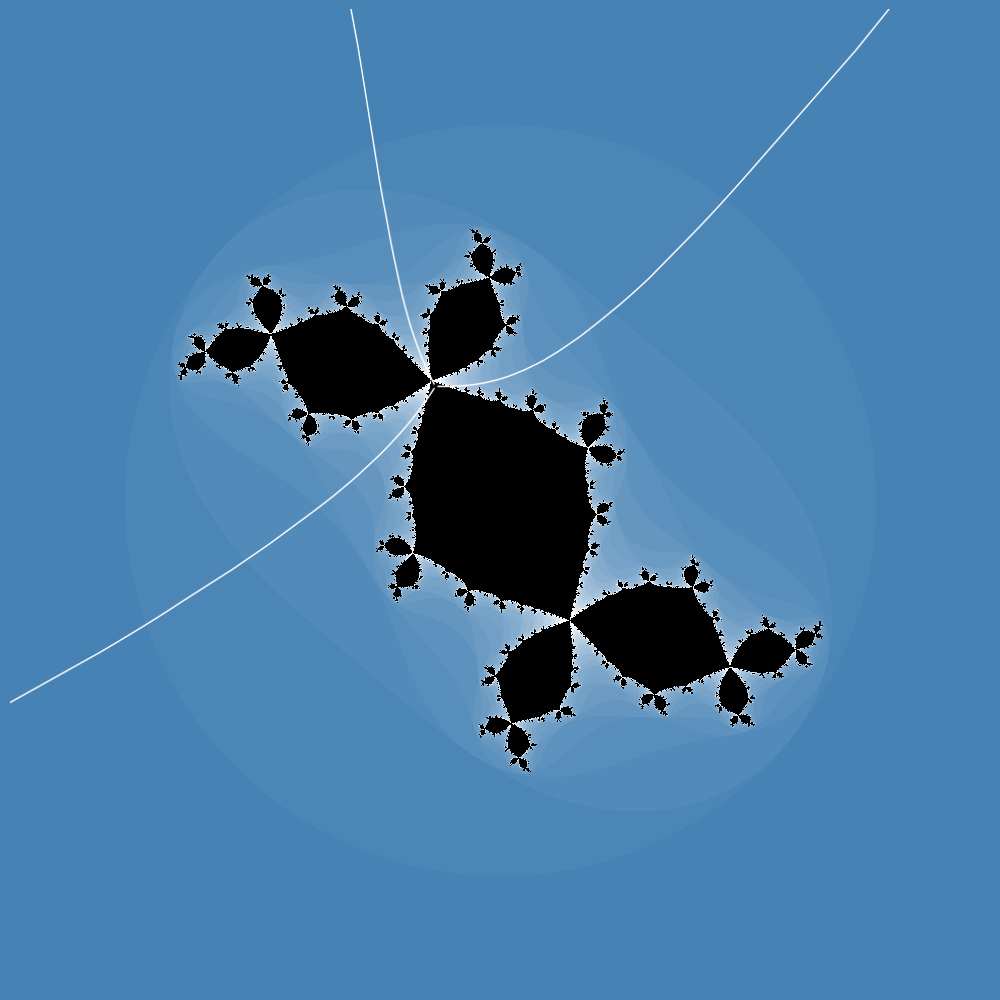

In [61]:
#raysplt = sum(list_plot(r, plotjoined = True, color= 'white') for r in rays)
#plot_with_julia(raysplt, z^2 + c, pixel_count = 1000)